In [21]:
#初始化数据集
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
#Linear Regression uses Housing in LIBSVM Data, including 506 samples and each sample has 13 features. 
#The data is stored in housing.txt
def get_data():
    data = load_svmlight_file("./datasets/housing.txt")
    return data[0], data[1]
X,Y = get_data()
X_train, X_test, Y_train, Y_test = train_test_split(X.toarray(),Y, test_size=0.33, random_state=42)

In [2]:
#函数定义
#使用平方损失函数
def loss(y_predict,y_true):
    loss=0
    for i in range(len(y_predict)):
        loss+=(y_predict[i]-y_true[i])**2
    loss/=len(y_predict)
    return loss

In [12]:
#闭式解的线性回归使用sklearn的LinearRegression库
reg = LinearRegression()
reg.fit(X_train,Y_train)

y_predict_train=reg.predict(X_train)
loss_train=loss(y_predict_train,Y_train)

y_predict_test=reg.predict(X_test)
loss_val=loss(y_predict_test,Y_test)

In [13]:
print('loss_train:',loss_train)
print('loss_val:',loss_val)

loss_train: 22.985015840300786
loss_val: 20.724023437339795


In [22]:
#线性回归的梯度下降算法
n_samples, n_features = X_train.shape
X_train = np.column_stack((X_train, np.ones((n_samples, 1))))

n_samples, n_features = X_test.shape
X_test = np.column_stack((X_test, np.ones((n_samples, 1))))
Y_train = Y_train.reshape((-1, 1))
Y_test=Y_test.reshape((-1, 1))

learning_rate = 0.000006  #学习速率
max_epoch = 200  #最大迭代次数

losses_train = []
losses_val = []
m,n=X_train.shape
w = np.ones((n,1))

In [70]:
for epoch in range(max_epoch):
    diff = np.dot(X_train, w) - Y_train
    G =np.dot(X_train.T, diff)/m  # calculate the gradient
    w -= learning_rate * G  # update the parameters

    Y_predict = np.dot(X_train, w)  # predict under the train set
    loss_train = loss(Y_predict,Y_train)  # calculate the absolute differences
    losses_train.append(loss_train)

    Y_predict = np.dot(X_test, w)  # predict under the validation set
    loss_val = loss(Y_predict,Y_test)  # calculate the absolute differences
    losses_val.append(loss_val)

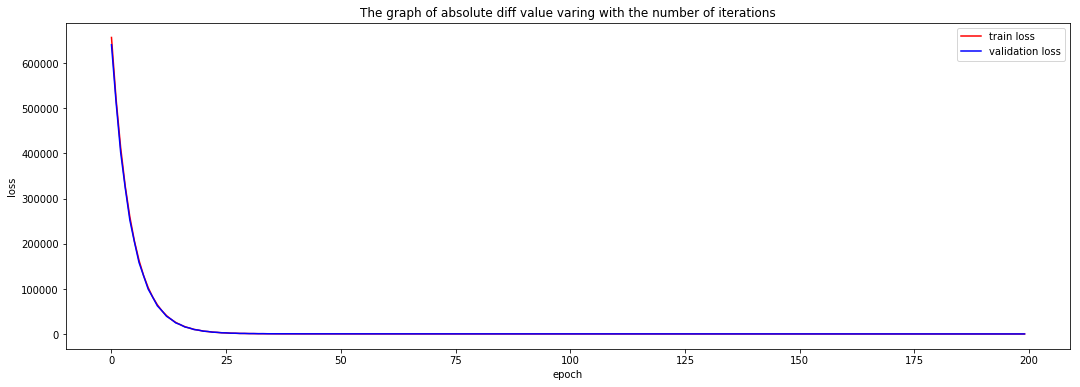

In [72]:
plt.figure(figsize=(18, 6))
plt.plot(losses_train, "-", color="r", label="train loss")
plt.plot(losses_val, "-", color="b", label="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title("The graph of loss varing with the number of iterations")
plt.savefig('./figures/Regression_by_gd.png')